In [69]:
%load_ext autoreload
%autoreload 2

import numpy as np
from final_algo import new_algo
import networkx as nx
import matplotlib.pyplot as plt
from paper_sims_util import run_single_MTP, attr_threshold, modularity
import sklearn.covariance
from sklearn.covariance import GraphicalLassoCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
stocks = np.load('stockdata_data.npy')
stocks_log = np.diff(np.log(stocks), axis = 0)
print(stocks_log.shape)

info = np.load('stockdata_info.npy')
print(info.shape)
print(set(info[:, 1]))

(1257, 452)
(452, 3)
{'Materials', 'Industrials', 'Consumer Discretionary', 'Telecommunications Services', 'Energy', 'Health Care', 'Consumer Staples', 'Information Technology', 'Financials', 'Utilities'}


In [72]:
num_stocks = 50

In [73]:
sector = info[:num_stocks, 1]
S = np.cov(stocks_log[:, :num_stocks].T)
X = stocks_log[:, :num_stocks]

In [92]:
prec = new_algo(X, m=0.2)

Running new algorithm
N=1257, M=4
Working on l = 0
Working on l = 1


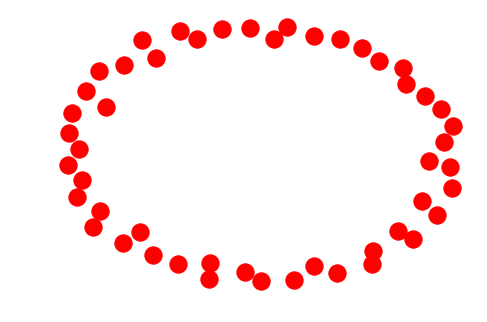

In [93]:
graph = nx.from_numpy_matrix(prec)
nx.draw(graph)

In [94]:
modularity(graph, sector)

0.8695999999999967

In [77]:
glasso = GraphicalLassoCV(alphas = 10, n_refinements = 10, cv=5)
glasso.fit(S)
glassocv_prec = glasso.get_precision()
glassocv_graph = nx.from_numpy_matrix(glasso_prec)

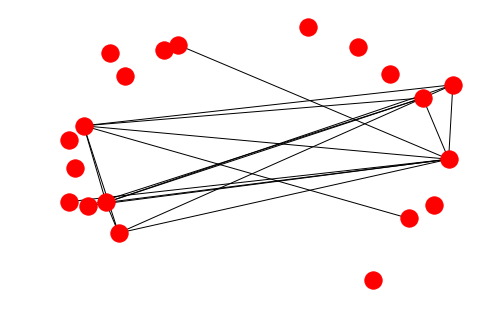

In [78]:
nx.draw(glassocv_graph)

In [79]:
modularity(glassocv_graph, sector)

0.8081374224532809

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)


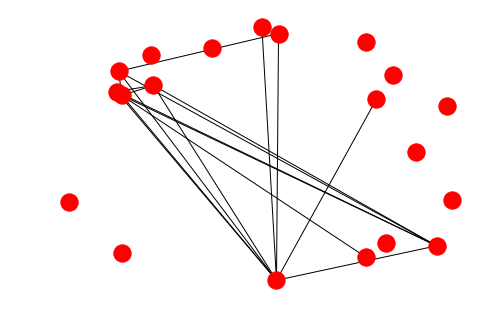

In [50]:
glasso_prec = sklearn.covariance.graph_lasso(S, alpha = 0.0002)[1]
glasso_graph = nx.from_numpy_matrix(glasso_prec)
nx.draw(glasso_graph)

In [22]:
MTP2_og_prec = run_single_MTP(S)

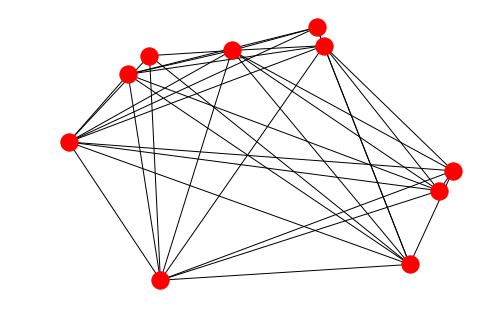

In [23]:
MTP2_prec = attr_threshold(MTP2_og_prec, 0.8)
MTP2_graph = nx.from_numpy_matrix(MTP2_prec)
nx.draw(MTP2_graph)